<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="B nazanin" size=5>
<font color=red size=7>
<p></p>
<div align=right>  تمرین های عملی سری دوم نوروساینس </div>   
</font>
<p></p>    
<div align=right>
<font size=6>
محمد امین بنائیان زاده 
98208835
</font>
</div> 
    
<hr>

</font></div>

In [ ]:
from brian2 import *

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="B nazanin" size=5>
سوال اول
</font></div>

In [16]:
Cm = 200 * pF
El = -65 * mV
EK = -90 * mV
ENa = 50 * mV
gNa = 20 * usiemens
gK = 6 * usiemens
gl = 10 * psiemens
VT = -63 * mV

eqs = '''
dv/dt = 1/Cm * (gl*(El - v) + gNa * (m**3) * h * (ENa-v)+gK*(n**4)*(EK-v) + I) : volt
dn/dt = an*(1-n) - bn * n : 1
dh/dt = ah*(1-h) - bh * h : 1
dm/dt = am*(1-m) - bm * m : 1
an = (0.032*(15-v/mV+VT/mV)) / (exp((15-v/mV+VT/mV)/5) - 1) / ms : Hz
am = (0.32*(13 - v/mV + VT/mV)) / (exp((13 - v/mV + VT/mV)/4) - 1) / ms: Hz
ah = 0.128 * exp((17 - v/mV + VT/mV)/18) /ms : Hz
bh = 4 /(exp((40 - v/mV + VT/mV)/5) + 1) / ms: Hz
bn = 0.5 * exp((10 - v/mV + VT/mV)/40) / ms: Hz
bm = (0.28*(v/mV -40 - VT/mV)) / (exp((v/mV - 40 - VT/mV)/5) - 1) / ms: Hz
'''

y_lim = [-90,50]

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="B nazanin" size=5>
بخش اول
<br>
نمودارهای مربوط به m و n و h یکبار زیر هم و بار دیگر روی یکدیگر رسم شده‌اند.
</font></div>

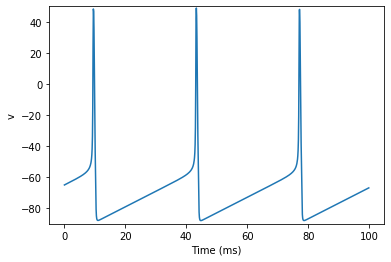

<Figure size 432x288 with 0 Axes>

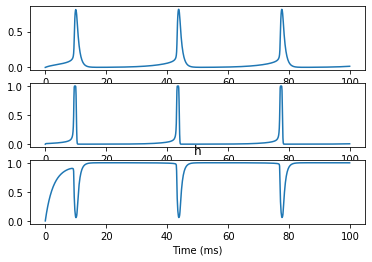

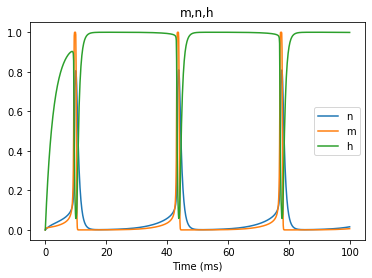

In [19]:
start_scope()

I = 200 * pA

G = NeuronGroup(1, eqs,threshold='v > -50*mV', refractory='v > -50*mV', method='exponential_euler')
M = StateMonitor(G, ['v','n','h', 'm',], record=True)

G.v = El
G.n = 0
G.h = 0
G.m = 0

run(100*ms)

figure()
plot(M.t/ms, M.v[0]/mV)
xlabel('Time (ms)')
ylabel('v');
ylim(y_lim)


figure()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.plot(M.t/ms, M.n[0], label = 'n')
title("n")
xlabel('Time (ms)')

ax2.plot(M.t/ms, M.m[0], label = 'm')
title("m")
xlabel('Time (ms)')

ax3.plot(M.t/ms, M.h[0], label = 'h')
title("h")
xlabel('Time (ms)')


figure()
plot(M.t/ms, M.n[0], label = 'n')
plot(M.t/ms, M.m[0], label = 'm')
plot(M.t/ms, M.h[0], label = 'h')
title("m,n,h")
xlabel('Time (ms)')
legend()

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="B nazanin" size=5>
<hr>
بخش دوم
<br>
به منظور پیوسته شدن نمودار f-I، طول گام‌های شبیه سازی کوچک انتخاب شده‌اند. لذا ممکن است اجرای کد زیر اندکی زمانگیر باشد.
</font></div>

Text(0.5, 0, 'current (pA)')

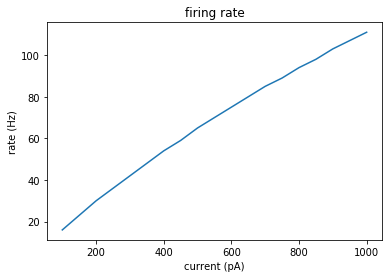

In [22]:
start_scope()
Is = np.arange (100 , 1000 + 50 , 50) * pA
rates = []

for I in Is:
    G = NeuronGroup(1, eqs,threshold='v > -50*mV', refractory='v > -50*mV', method='exponential_euler')
    
    SM = SpikeMonitor(G)
    
    G.v = El
    G.n = 0
    G.h = 0
    G.m = 0

    duration = 1000 * ms
    run(duration)
    
    rates.append (SM.count/(duration / second))

Is = Is / pA

figure()
plot (Is , rates)
title ('firing rate')
ylabel("rate (Hz)")
xlabel("current (pA)")



<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="B nazanin" size=5>
توضیحات:
<br>
اگر به یک نورون جریان ثابتی داده شود، بسته به نوع نورون و جریان ورودی، از مقدار جریان آستانه‌ای به بعد نورون دچار repetetive firing می‌شود.
به عبارت دیگر، وجود یک جریان ثابت باعث می‌شود ولتاژ نورون بعد از هر اسپایک خیلی سریع دوباره به آستانه اسپایک برسد و لذا دنباله‌ای از اسپایک‌ها دیده خواهد شد. 
بین جریان ثابت ورودی و نرخ اسپایک‌های نورون، ارتباط مستقیم وجود دارد. به عبارت دقیق‌تر، چون ثابت زمانی نورون مقداری ثابت است، هر چه جریان ورودی بیشتر باشد، 
ولتاژ نورون بعد از استراحت، سریعتر به آستانه می‌رسد و لذا تعداد اسپایک بیشتری در واحد زمان می‌توان مشاهده نمود.
</font></div>

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="B nazanin" size=5>
<hr>
بخش سوم
</font></div>

(-90, 50)

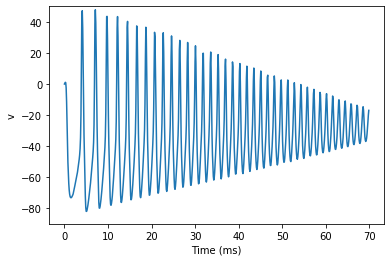

In [26]:
start_scope()
Is = np.arange (1 , 71 , 1) * nA
rates = []
G = NeuronGroup(1, eqs,threshold='v > -50*mV', refractory='v > -50*mV', method='exponential_euler')
M = StateMonitor(G, ['v'], record=True)

for I in Is:
    run (1*ms)

figure()
plot(M.t/ms, M.v[0]/mV)
xlabel('Time (ms)')
ylabel('v');
ylim(y_lim)

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="B nazanin" size=5>
<hr>
 همانطور که مشاهده می‌شود، با زیاد شدن جریان ورودی، دامنه نوسانات کمتر می‌شود. این پدیده excitation blocking نام دارد. 
 علت وقوع چنین پدیده‌ای آن است که با زیاد شدن جریان، نقطه fixed point که تا کنون یک نقطه ناپایدار بوده و باعث 
به وجود آمدن limit cycle و پدیده
repetetive firing
.می‌شد، کم کم تبدیل به یک نقطه پایدار شده و در نتیجه نوسانات از بین می‌روند 
نقطه این تغییر وضعیت Androv-Hop bifurcation نام دارد.
این مسئله در کتاب آقای Izhikevich به صورت زیر ترسیم شده است:
<br>
<img src='Images/AH_Bif.png'> 
</font></div>

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="B nazanin" size=5>
<hr>
بخش چهارم
</font></div>

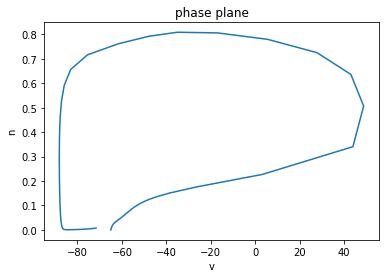

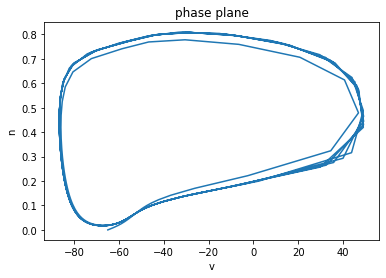

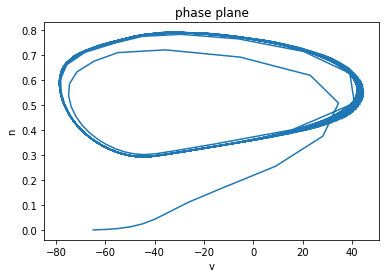

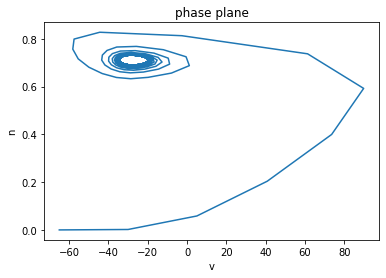

In [10]:
start_scope()
Is = [100 * pA , 1 * nA, 10 * nA, 70 * nA] 

for I in Is:
    G = NeuronGroup(1, eqs,threshold='v > -50*mV', refractory='v > -50*mV', method='exponential_euler')
    M = StateMonitor(G, ['v','n'], record=True)
    
    
    G.v = El
    G.n = 0
    G.h = 0
    G.m = 0

    duration = 50 * ms
    run(duration)

    
    figure()
    plot (M.v[0]/mV , M.n[0])
    title ('phase plane')
    ylabel("n")
    xlabel("v")



<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="B nazanin" size=5>
<hr>
همانطور که در بخش قبل نیز توضیح داده شد، با زیاد شدن جریان limit cycle
محدود و محدوتر می‌شود تا وقتی که نقطه به stable fixed point
تبدیل شده و limit cycle
کاملاً جذب می‌شود.
لذا در این شکل‌ها نیز دیده می‌شود که با زیاد شدن جریان، دامنه نوسانات v دائماً کمتر می‌شود.
</font></div>

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="B nazanin" size=5>
<hr>
بخش پنجم
</font></div>

No handles with labels found to put in legend.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


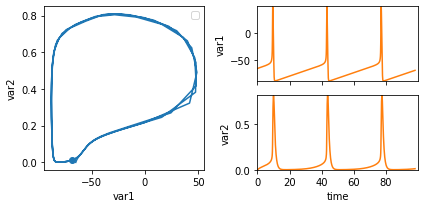

In [11]:
import draw_utils


start_scope()

I = 200 * pA
G = NeuronGroup(1, eqs,threshold='v > -50*mV', refractory='v > -50*mV', method='exponential_euler')
M = StateMonitor(G, ['v','n'], record=True)
    
    
G.v = El
G.n = 0
G.h = 0
G.m = 0

duration = 100 * ms
run(duration)


draw_utils.phaseplane_animation(M.t/ms, M.v[0]/mV , M.n[0])



<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="B nazanin" size=5>
<hr>
سوال دوم
<br>
بخش‌های اول و دوم
<br>
برای شروع ابتدا لازم است تا معادلات nullcline‌ها استخراج شود. این کار به صورت زیر انجام شده است:
<br>
<img src='Images\nullclines.png'>
</font></div>

No handles with labels found to put in legend.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


No handles with labels found to put in legend.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


No handles with labels found to put in legend.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


No handles with labels found to put in legend.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


No handles with labels found to put in legend.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


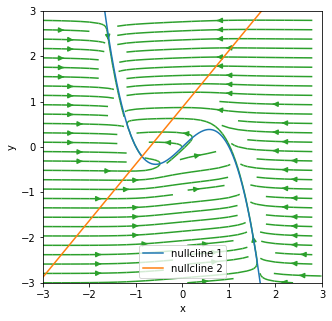

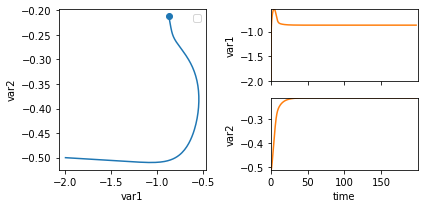

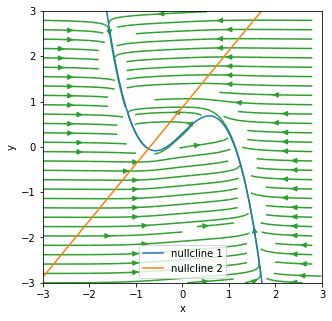

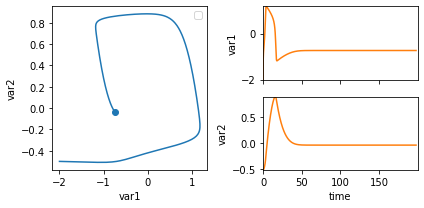

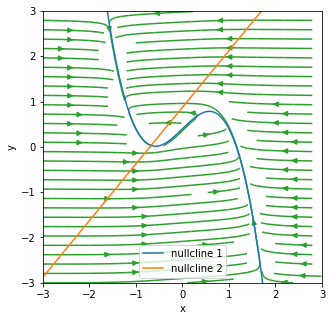

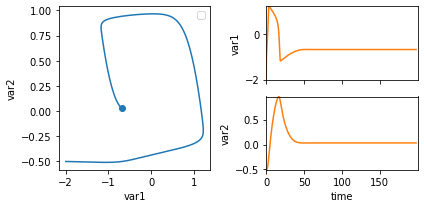

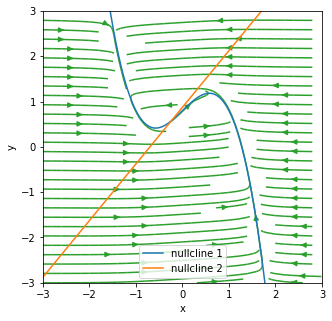

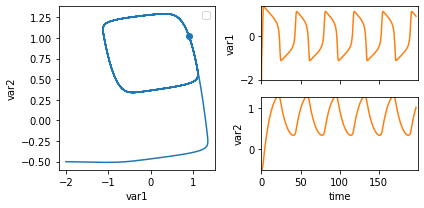

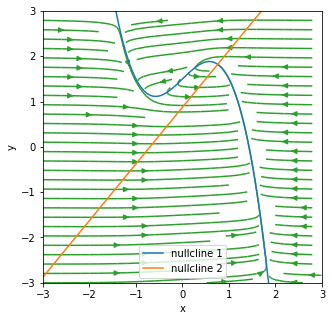

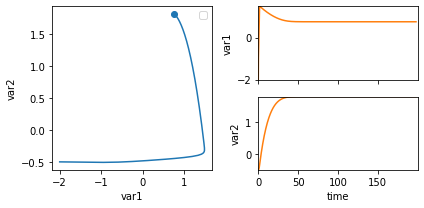

In [45]:
#part2
import draw_utils

start_scope()

eqs = '''
dv/dt = (v - v**3 - w + I)/ms : 1 
dw/dt = (0.08*(v+0.7-0.8*w))/ms : 1
'''

Is = [0 , 0.3 , 0.4, 0.8, 1.5] 
for I in Is:

    G = NeuronGroup(1, eqs, method='euler')
    M = StateMonitor(G, ['v', 'w'] , record=True)

    G.v = -2
    G.w = -0.5

    def F_(X, Y, params):
        return X - X**3 - Y + params[0]

    def G_(X, Y, params):
        return 0.08*(X+0.7-0.8*Y)

    def f_null1(x, params):
        return +x-x**3 + params[0]

    def f_null2(x, params):
        return (x+0.7)/0.8

    params = [I]

    duration = 200 * ms
    run(duration)

    draw_utils.plot_phaseplane(F_, G_, f_null1, f_null2, extra_params=params, x_range=[-3,3], y_range=[-3,3] , name = 'phaseplane' + str (I))
    draw_utils.phaseplane_animation(M.t/ms, M.v[0] , M.w[0] , name = 'animation' + str(I))

    print ("===============================")



<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="B nazanin" size=5>
<hr>
بخش سوم
<br>
در این بخش ابتدا لازم است تا نقطه fixed point این دستگاه مشخص شود.
این کار طبق معادله زیر و با کمک دستور numpy.root انجام شده است:
<br>
<img src='Images\fixedeq.png'>
<br>
در گام بعد، مشتقات حساب شده و مقادیر ویژه ماتریس ژاکوبین برای نقطه تعادل بررسی می‌شوند:
<br>
<img src='Images\ders.png'>
</font></div>

In [64]:
def find_fixed_point (I):
    p = [-4 , 0 , -1 , 4*I-3.5]
    for r in numpy.roots(p):
        if (np.abs (np.imag (r)) < 0.02):
            return get_point(np.real(r))

def get_point (V):
    return V , (V+0.7)/0.8

def getJacobian(V,W):
    return np.array ([[1-3*(V**2),-1],[0.08 , -0.064]])

for i,I in enumerate (Is):
    V, W = find_fixed_point(I)
    jacob = getJacobian(V,W)
    lambdas, _ = np.linalg.eig (jacob)
    l0 , l1 = lambdas
    np.printoptions(precision=3, suppress=True)
    print ("The fixed point (V,W) = ({0:3.3f},{1:3.3f}) has eigen values (l0,l1) =  ({2:3.3f},{3:3.3f}), hence the point is a(an) ".format(V,W,l0,l1) , end = "")
    r0 , r1 = np.real(l0), np.real(l1) 
    i0 , i1 = np.imag(l0), np.imag(l1) 
    if r0 > 0 and r1 > 0:
        if i0 > 0.02:
            print ("oscilatory unstable fixed point")
        else:
            print ("unstable fixed point")

    elif r0 < 0 and r1 < 0:
        if i0 > 0.02:
            print ("oscilatory stable fixed point")
        else:
            print ("stable fixed point")
    else:
        if i0 > 0.02:
            print ("oscilatory saddle point")
        else:
            print ("saddle point")
            
    print ("===========")

The fixed point (V,W) = (-0.870,-0.212) has eigen values (l0,l1) =  (-1.198,-0.135), hence the point is a(an) stable fixed point
The fixed point (V,W) = (-0.732,-0.040) has eigen values (l0,l1) =  (-0.335+0.079j,-0.335-0.079j), hence the point is a(an) oscilatory stable fixed point
The fixed point (V,W) = (-0.674,0.032) has eigen values (l0,l1) =  (-0.214+0.240j,-0.214-0.240j), hence the point is a(an) oscilatory stable fixed point
The fixed point (V,W) = (-0.243,0.572) has eigen values (l0,l1) =  (0.721,0.038), hence the point is a(an) unstable fixed point
The fixed point (V,W) = (0.758,1.822) has eigen values (l0,l1) =  (-0.563,-0.224), hence the point is a(an) stable fixed point


<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="B nazanin" size=5>
<hr>
همانطور که می‌بینیم، 5 نقطه تعادل متفاوت برای جریان‌های مختلف وجود دارد که در 4 مورد نقطه پایدار است و فقط یک مورد نقطه ناپایدار دارد که منجر به بروز limit cycle و repetetive firing می‌شود.
</font></div>